# Prueba Práctica – Data Scientist

## GLOBAL ALUMNI 

Dado el dataset [gamestop_product_reviews_dataset_sample](https://www.kaggle.com/datasets/thedevastator/gamestop-customer-reviews-dataset), responde a las siguientes preguntas:

### 1. Preprocesamiento de datos:

1. **¿Cómo limpiaría y preprocesaría los datos para un análisis más detallado?**  


2. **¿Cómo normalizarías los datos?**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
pre_processed_reviews_df = pd.read_csv('./data/processed/pre_processed_reviews.csv', sep=',',decimal=',')
pre_processed_reviews_df.head(2)

,index,url,brand,name,prod_category,prod_subcategory,prod_type,sku,reviewer_name,review_title,...,helpful_count,not_helpful_count,reviewed_at,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,review_status
0,0,https://www.gamestop.com/electronics/tvs-monit...,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,328244,Leeford,Untitled Review,...,0,0,10 months ago,5.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229196240,d749678d-aeba-5a6b-b8e2-8d2121463672,1
1,1,https://www.gamestop.com/electronics/tvs-monit...,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,328244,DJM7,Great looking screen!,...,0,0,10 months ago,4.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229179703,9f20312c-1047-5824-97d2-d5563b8fd046,1


### ¿Qué tipo de dato son las variables y cuantos son en el dataset?

In [3]:
pre_processed_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4559 entries, 0 to 4558
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               4559 non-null   int64 
 1   url                 4559 non-null   object
 2   brand               4559 non-null   object
 3   name                4559 non-null   object
 4   prod_category       4559 non-null   object
 5   prod_subcategory    4559 non-null   object
 6   prod_type           4559 non-null   object
 7   sku                 4559 non-null   int64 
 8   reviewer_name       4559 non-null   object
 9   review_title        4559 non-null   object
 10  review_description  4559 non-null   object
 11  verifed_purchaser   4559 non-null   object
 12  helpful_count       4559 non-null   int64 
 13  not_helpful_count   4559 non-null   int64 
 14  reviewed_at         4559 non-null   object
 15  rating              4559 non-null   object
 16  average_rating      4559

In [4]:
pre_processed_reviews_df.drop_duplicates(subset= 'review_description', inplace=True)

## Cambiando el tipo de dato str de rating a int64

In [5]:
# Convert 'rating' and 'average_rating' to numeric, coercing errors to NaN
pre_processed_reviews_df['rating'] = pd.to_numeric(pre_processed_reviews_df['rating'], errors='coerce')
pre_processed_reviews_df['average_rating'] = pd.to_numeric(pre_processed_reviews_df['average_rating'], errors='coerce')

# Drop rows with NaN values in 'rating' or 'average_rating'
pre_processed_reviews_df.dropna(subset=['rating', 'average_rating'], inplace=True)

# Convert the 'rating' column to int64
pre_processed_reviews_df['rating'] = pre_processed_reviews_df['rating'].astype(float).astype('int64')


### ¿Cuántas variables de cada tipo de dato tenemos en el dataset?

In [6]:
pre_processed_reviews_df.dtypes

index                   int64
url                    object
brand                  object
name                   object
prod_category          object
prod_subcategory       object
prod_type              object
sku                     int64
reviewer_name          object
review_title           object
review_description     object
verifed_purchaser      object
helpful_count           int64
not_helpful_count       int64
reviewed_at            object
rating                  int64
average_rating        float64
reviews_count           int64
reviews_link           object
comment_id              int64
uniq_id                object
review_status           int64
dtype: object

In [7]:
pre_processed_reviews_df.dtypes.value_counts()

object     13
int64       8
float64     1
Name: count, dtype: int64

### ¿Cuántas variables y observaciones tenemos en el dataset?

In [8]:
print(pre_processed_reviews_df.shape)

# Cuantos datos tenemos en el dataset
print(pre_processed_reviews_df.size)

(4557, 22)
100254


## Renombrar la columna 'name' por 'product_name' (nombre del producto)

In [9]:
pre_processed_reviews_df.rename(columns={"name": "product_name"},inplace=True)

In [10]:
columns_df  = pre_processed_reviews_df.columns
print(columns_df)

Index(['index', 'url', 'brand', 'product_name', 'prod_category',
       'prod_subcategory', 'prod_type', 'sku', 'reviewer_name', 'review_title',
       'review_description', 'verifed_purchaser', 'helpful_count',
       'not_helpful_count', 'reviewed_at', 'rating', 'average_rating',
       'reviews_count', 'reviews_link', 'comment_id', 'uniq_id',
       'review_status'],
      dtype='object')


In [11]:
print(pre_processed_reviews_df.shape)
print(pre_processed_reviews_df.size)

(4557, 22)
100254


### ¿Cuál es la proporción de valores nulos por cada variable?

C:\Users\andre\.conda\envs\m3_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


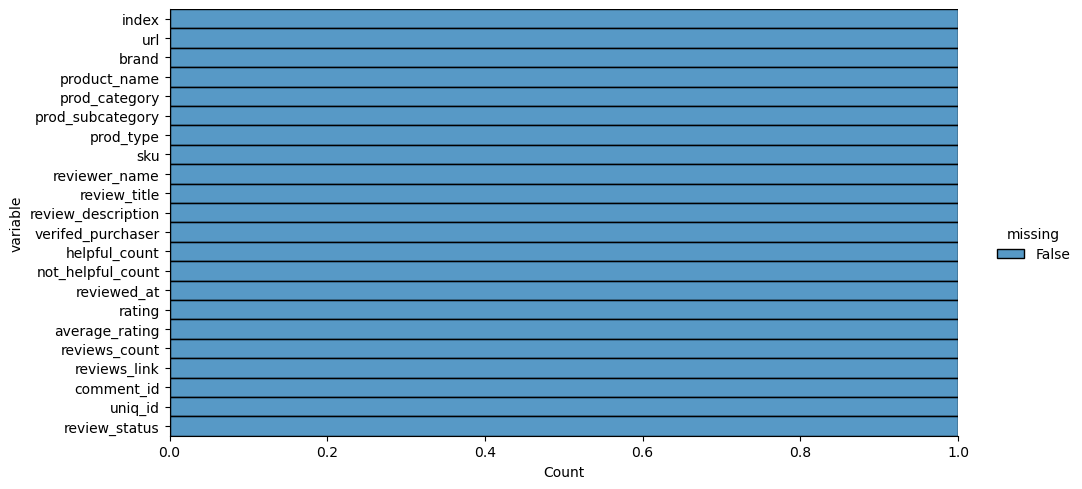

In [12]:
pre_processed_reviews_df.isnull().melt(value_name='missing').pipe(
    lambda df: (
        sns.displot(
            data=df,
            y='variable',
            hue='missing',
            multiple='fill',
            aspect=2
        )
    )
)

In [13]:
print(pre_processed_reviews_df['review_title'].unique())
print(pre_processed_reviews_df['review_title'].nunique())

['Untitled Review' 'Great looking screen!' 'Quality' ...
 'You Should Race to get This Game' 'First time Forza owner'
 'I give it a 9 out of ten. Best racer out there']
3722


# Parte I - Preprocesamiento de datos

In [14]:
# Cuantos de cada tipo de datos hay en el dataset
pre_processed_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4557 entries, 0 to 4558
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               4557 non-null   int64  
 1   url                 4557 non-null   object 
 2   brand               4557 non-null   object 
 3   product_name        4557 non-null   object 
 4   prod_category       4557 non-null   object 
 5   prod_subcategory    4557 non-null   object 
 6   prod_type           4557 non-null   object 
 7   sku                 4557 non-null   int64  
 8   reviewer_name       4557 non-null   object 
 9   review_title        4557 non-null   object 
 10  review_description  4557 non-null   object 
 11  verifed_purchaser   4557 non-null   object 
 12  helpful_count       4557 non-null   int64  
 13  not_helpful_count   4557 non-null   int64  
 14  reviewed_at         4557 non-null   object 
 15  rating              4557 non-null   int64  
 16  average_rat

#### ¿Qué columnas contienen las features de las reseñas o reviews?

In [15]:
print(pre_processed_reviews_df.columns)
feature_col = pre_processed_reviews_df[['index', 'url', 'product_name', 'brand', 'sku', 'reviewer_name', 'review_title',
       'review_description', 'verifed_purchaser', 'helpful_count',
       'not_helpful_count', 'reviewed_at', 'rating', 'average_rating',
       'reviews_count', 'reviews_link', 'comment_id', 'uniq_id','review_status']]
feature_col.head(2)

Index(['index', 'url', 'brand', 'product_name', 'prod_category',
       'prod_subcategory', 'prod_type', 'sku', 'reviewer_name', 'review_title',
       'review_description', 'verifed_purchaser', 'helpful_count',
       'not_helpful_count', 'reviewed_at', 'rating', 'average_rating',
       'reviews_count', 'reviews_link', 'comment_id', 'uniq_id',
       'review_status'],
      dtype='object')


,index,url,product_name,brand,sku,reviewer_name,review_title,review_description,verifed_purchaser,helpful_count,not_helpful_count,reviewed_at,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,review_status
0,0,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Leeford,Untitled Review,My new OLED is a upgrade and it's great! This...,No,0,0,10 months ago,5,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229196240,d749678d-aeba-5a6b-b8e2-8d2121463672,1
1,1,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,DJM7,Great looking screen!,Rating is really a 4.5 but that's unavailable....,No,0,0,10 months ago,4,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229179703,9f20312c-1047-5824-97d2-d5563b8fd046,1


#### ¿Qué columna contiene la feature que predeciremos? ¿Cuál es el código que representa positivo y negativo?

In [16]:
target_col = pre_processed_reviews_df['review_status']
target_col.head()

0    1
1    1
2    1
3    1
4    1
Name: review_status, dtype: int64

#### ¿Necesitamos transformar alguna de las columnas de valores categóricos a numéricos? Si es así, ¿cuáles son estas columnas?

In [17]:
pre_processed_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4557 entries, 0 to 4558
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               4557 non-null   int64  
 1   url                 4557 non-null   object 
 2   brand               4557 non-null   object 
 3   product_name        4557 non-null   object 
 4   prod_category       4557 non-null   object 
 5   prod_subcategory    4557 non-null   object 
 6   prod_type           4557 non-null   object 
 7   sku                 4557 non-null   int64  
 8   reviewer_name       4557 non-null   object 
 9   review_title        4557 non-null   object 
 10  review_description  4557 non-null   object 
 11  verifed_purchaser   4557 non-null   object 
 12  helpful_count       4557 non-null   int64  
 13  not_helpful_count   4557 non-null   int64  
 14  reviewed_at         4557 non-null   object 
 15  rating              4557 non-null   int64  
 16  average_rat

In [18]:
pre_processed_reviews_df.isnull().sum().sum()

0

In [19]:
pre_processed_reviews_df.dtypes.value_counts()

object     13
int64       8
float64     1
Name: count, dtype: int64

In [20]:
target_col.value_counts()

review_status
1    3119
0    1438
Name: count, dtype: int64

#### Observaciones:

1. La columna ['review_status'] es nuestro objetivo y consta de 1 y 0 (positivo y negativo, respectivamente) 

2. Los valores nulos se manejaron muy bien desde el principio, en el sentido que no se tuvieron que eliminar registros.

3. Hay demasiadas columnas categóricas (13) en comparación con las 7 numéricas.

4. Ver en que categorias se concentran más los reviews negativos y los positivos.

5. Hacer un diagrama de pareto

In [21]:
pre_processed_reviews_df.columns

Index(['index', 'url', 'brand', 'product_name', 'prod_category',
       'prod_subcategory', 'prod_type', 'sku', 'reviewer_name', 'review_title',
       'review_description', 'verifed_purchaser', 'helpful_count',
       'not_helpful_count', 'reviewed_at', 'rating', 'average_rating',
       'reviews_count', 'reviews_link', 'comment_id', 'uniq_id',
       'review_status'],
      dtype='object')

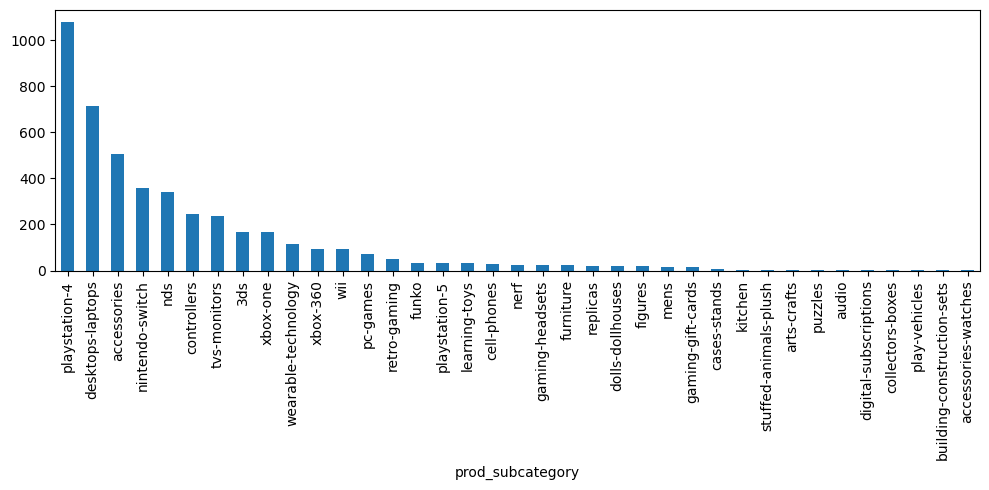

In [22]:
plt.figure(figsize=(10, 5))
pre_processed_reviews_df['prod_subcategory'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

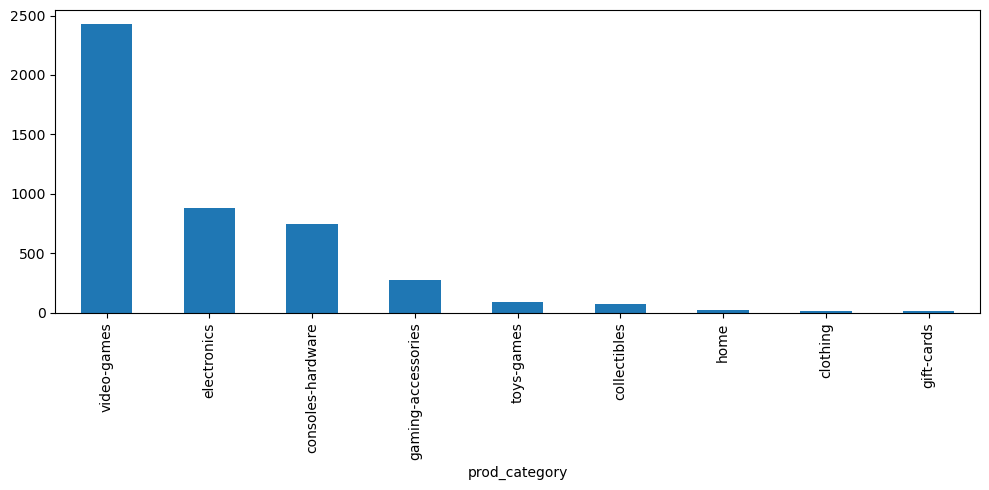

In [23]:
plt.figure(figsize=(10, 5))
pre_processed_reviews_df['prod_category'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

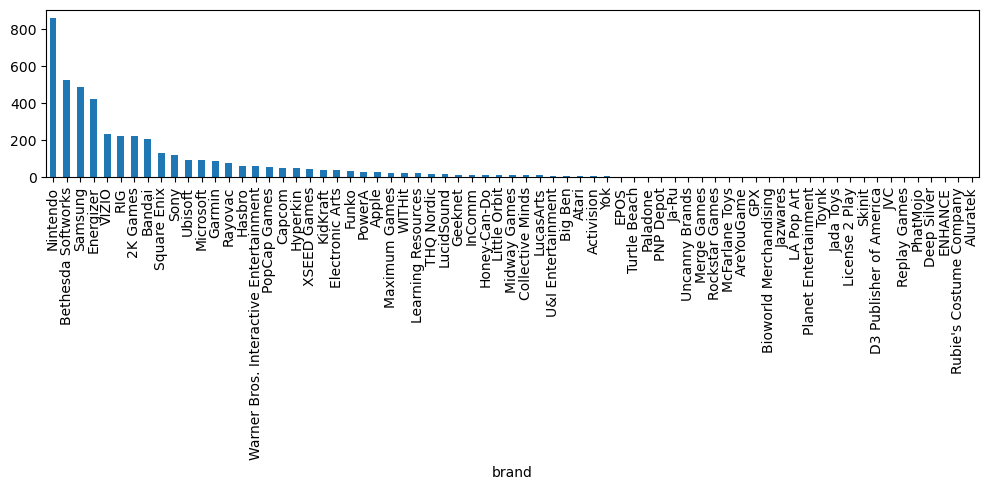

In [24]:
plt.figure(figsize=(10, 5))
pre_processed_reviews_df['brand'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

## Analizar values únicos por columna

In [25]:
for i in columns_df:
    print('\n',f'<= {i}: => ',pre_processed_reviews_df[i].unique())


 <= index: =>  [   0    1    2 ... 4683 4684 4685]

 <= url: =>  ['https://www.gamestop.com/electronics/tvs-monitors/televisions/products/vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/11180293.html'
 'https://www.gamestop.com/video-games/nintendo-switch/products/yoshis-crafted-world---nintendo-switch/10161220.html'
 'https://www.gamestop.com/video-games/pc-games/products/supreme-commander-2/10075055.html'
 'https://www.gamestop.com/video-games/playstation-4/products/kung-fu-panda-showdown-of-legendary-legends---playstation-4/10122327.html'
 'https://www.gamestop.com/gaming-accessories/controllers/nintendo-switch/products/powera-enhanced-wireless-controller-for-nintendo-switch-link-gold/11111433.html'
 'https://www.gamestop.com/video-games/playstation-4/products/wrc-8-fia-world-rally-championship---playstation-4/11094958.html'
 'https://www.gamestop.com/collectibles/figures/products/hasbro-star-wars-the-black-series-rogue-one-a-star-wars-story-jyn-erso-6-in-action-figure/11147838.ht

## Analizar Cantidad de values únicos por columna (no. de categorias)

In [26]:
for i in columns_df:
    print('\n',f'{i}: => ',pre_processed_reviews_df[i].nunique())


 index: =>  4557

 url: =>  120

 brand: =>  69

 product_name: =>  120

 prod_category: =>  9

 prod_subcategory: =>  37

 prod_type: =>  98

 sku: =>  120

 reviewer_name: =>  4341

 review_title: =>  3722

 review_description: =>  4557

 verifed_purchaser: =>  2

 helpful_count: =>  38

 not_helpful_count: =>  44

 reviewed_at: =>  55

 rating: =>  5

 average_rating: =>  89

 reviews_count: =>  70

 reviews_link: =>  528

 comment_id: =>  4557

 uniq_id: =>  4557

 review_status: =>  2


## Eliminar feature irrelevantes para el modelado de ML

In [27]:
pre_processed_reviews_df.drop(columns=['index','url','sku','reviewer_name','review_title',
                                      'verifed_purchaser','reviews_link','comment_id','uniq_id',
                                      'reviewed_at'], inplace=True)

In [28]:
pre_processed_reviews_df.dtypes.value_counts()

object     6
int64      5
float64    1
Name: count, dtype: int64

In [29]:
pre_processed_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4557 entries, 0 to 4558
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               4557 non-null   object 
 1   product_name        4557 non-null   object 
 2   prod_category       4557 non-null   object 
 3   prod_subcategory    4557 non-null   object 
 4   prod_type           4557 non-null   object 
 5   review_description  4557 non-null   object 
 6   helpful_count       4557 non-null   int64  
 7   not_helpful_count   4557 non-null   int64  
 8   rating              4557 non-null   int64  
 9   average_rating      4557 non-null   float64
 10  reviews_count       4557 non-null   int64  
 11  review_status       4557 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 462.8+ KB


In [30]:
pre_processed_reviews_df.describe(include='object')

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description
count,4557,4557,4557,4557,4557,4557
unique,69,120,9,37,98,4557
top,Nintendo,Energizer MAX Alkaline Batteries 8 Pack - D,video-games,playstation-4,batteries-chargers,My new OLED is a upgrade and it's great! This...
freq,861,424,2425,1077,504,1


In [31]:
pre_processed_reviews_df.describe()

,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status
count,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000
mean,1.144174,0.866798,4.345403,4.400699,566.947553,0.684442
std,3.772977,4.831174,1.128715,0.357510,525.917296,0.464789
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,4.000000,4.272700,129.000000,0.000000
50%,0.000000,0.000000,5.000000,4.419500,424.000000,1.000000
75%,1.000000,0.000000,5.000000,4.605300,643.000000,1.000000
max,103.000000,125.000000,5.000000,5.000000,2390.000000,1.000000


In [32]:
pre_processed_reviews_df_corr = round(pre_processed_reviews_df.corr(numeric_only=True), 2)
pre_processed_reviews_df_corr.style.background_gradient(cmap='coolwarm')

,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status
helpful_count,1.000000,0.290000,-0.070000,-0.110000,-0.060000,0.020000
not_helpful_count,0.290000,1.000000,-0.300000,-0.080000,-0.030000,-0.150000
rating,-0.070000,-0.300000,1.000000,0.360000,0.030000,0.460000
average_rating,-0.110000,-0.080000,0.360000,1.000000,0.200000,0.210000
reviews_count,-0.060000,-0.030000,0.030000,0.200000,1.000000,0.000000
review_status,0.020000,-0.150000,0.460000,0.210000,0.000000,1.000000


In [33]:
pre_processed_reviews_df.dtypes

brand                  object
product_name           object
prod_category          object
prod_subcategory       object
prod_type              object
review_description     object
helpful_count           int64
not_helpful_count       int64
rating                  int64
average_rating        float64
reviews_count           int64
review_status           int64
dtype: object

In [34]:
pre_processed_reviews_df.head()

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status
0,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,My new OLED is a upgrade and it's great! This...,0,0,5,4.2727,363,1
1,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,Rating is really a 4.5 but that's unavailable....,0,0,4,4.2727,363,1
2,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,I’m quite pleased with the entire product as a...,0,0,4,4.2727,363,1
3,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,I’ve only had my new Visio OLED65 mounted and ...,0,0,2,4.2727,363,1
4,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,The picture is very crisp and the blacks very ...,0,0,5,4.2727,363,1


In [35]:
from pathlib import Path
filepath = Path('./data/processed/processed_reviews.csv', index=False)  
filepath.parent.mkdir(parents=True, exist_ok=True) 
pre_processed_reviews_df.to_csv(filepath, index=False, encoding='utf-8')

# Parte II - Análisis exploratorio de los datos con NLP
1. **¿Cuáles son los términos relevantes más frecuentes en los comentarios?**  
   ¿Encuentras diferencias significativas entre la distribución de términos provenientes de comentarios positivos y negativos?  
   Para esta sección se entiende comentario positivo por aquel que termina recomendando el producto.

2. **Muestre una visualización básica de los datos**
-------------------------------------------------------------------------------------------------------

In [36]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
processed_reviews_df = pd.read_csv('./data/processed/processed_reviews.csv', sep=',',decimal=',')
processed_reviews_df.head(2)

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status
0,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,My new OLED is a upgrade and it's great! This...,0,0,5,4.2727,363,1
1,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,Rating is really a 4.5 but that's unavailable....,0,0,4,4.2727,363,1


1. **¿Cuáles son los términos relevantes más frecuentes en los comentarios?**  
   ¿Encuentras diferencias significativas entre la distribución de términos provenientes de comentarios positivos y negativos?  
   Para esta sección se entiende comentario positivo por aquel que termina recomendando el producto.

In [38]:
# Convert text to lowercase

import re
processed_reviews_df['review_description'] = processed_reviews_df['review_description'].str.lower()
processed_reviews_df['tags'] = processed_reviews_df['review_description']
processed_reviews_df.head(2)

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status,tags
0,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,my new oled is a upgrade and it's great! this...,0,0,5,4.2727,363,1,my new oled is a upgrade and it's great! this...
1,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,rating is really a 4.5 but that's unavailable....,0,0,4,4.2727,363,1,rating is really a 4.5 but that's unavailable....


In [39]:
import re
from nltk.corpus import stopwords
import nltk

# Descargar palabras vacías de NLTK
nltk.download('stopwords')

# Obtener las palabras vacías en inglés de NLTK
stop_words = set(stopwords.words('english'))

# Updating Stop Words

stop_words_upd = stop_words.copy()
stop_words_upd = ' '.join(stop_words)
stop_words_upd = re.sub(r'[^a-zA-Z0-9\s]', '', stop_words_upd)
stop_words_upd = set(stop_words_upd.split())

 # Struggling with these new other ones
stop_words_upd.update([
    '¿', '?', '~', '`', '!', '¡', '@', '#', '$', '%', '^',
    '*', '(', ')', '_', '-', '+', '=', '{', '}', '[',
    ']', '\\', ':', ';', '<', '>', '/', '.', ',', '&', '\n',
    '\r', '\t', '|', '“', '"', '–', '”', '©', '-', '—',
    '…', ';', '‘', '’','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she',
    'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
    'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
    'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',
    'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once',
    'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
    'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',
    'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',
    'don', 'should', 'now','im', 'youre', 'hes', 'shes', 'its', 'were', 'theyre','ive','youve','weve', 'theyve',
    'will','ill','youll', 'hell','shell','itll','well','theyll','would','id','youd','hed','shed','itd','wed','theyd'])

                             
stop_words = stop_words_upd | stop_words
print(stop_words)


{'up', "should've", 'thatll', 'as', 'hadnt', ',', 'couldnt', 'id', 'youd', 'hadn', 'through', 'shes', 'they', 'because', 'shouldnt', 'he', 'neednt', '*', 'weren', 'most', 'mightnt', "isn't", 'wasnt', 'wouldn', 's', '‘', '}', "you'd", 'this', 'couldn', 'no', '>', '=', 'was', 'during', 'o', 'against', 'each', 'aren', 'to', "couldn't", 'who', 'where', 'm', '\\', '%', 'do', 'or', 'not', '?', ':', '¿', 'hes', 'wont', '{', 'how', '©', 'from', 'hasnt', 'y', 'so', "mustn't", "weren't", '—', 'will', 'than', 'wed', 'needn', "aren't", '$', 'itd', 'haven', 'ain', 'himself', 'themselves', '&', 'me', 'theyre', ')', 'won', 'has', 'have', 'did', 'until', 'ill', 'an', 'which', 'had', 'with', 'that', "didn't", '+', 'am', 'when', "don't", 'below', "wasn't", 'you', 'those', 'wouldnt', 'theyll', 'didn', 'being', 'only', 'above', '\n', '“', 'herself', '"', "haven't", 'the', 'if', 'our', "wouldn't", 'for', "doesn't", '|', 'their', 'a', 'be', 'youll', 'why', 'now', 'itll', 'of', 'just', 'your', 'such', 'might

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
def stop_word(content):

    # Split the content into words
    words = content.split()

    # Remove stop words
    cleaned_words = [word for word in words if word.lower() not in stop_words]

    # Join the cleaned words back into a string
    cleaned_text = ' '.join(cleaned_words)
    
    return cleaned_text

processed_reviews_df['tags'] = processed_reviews_df['tags'].apply(stop_word)
processed_reviews_df.head()

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status,tags
0,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,my new oled is a upgrade and it's great! this...,0,0,5,4.2727,363,1,new oled upgrade great! third vizio tv replace...
1,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,rating is really a 4.5 but that's unavailable....,0,0,4,4.2727,363,1,rating really 4.5 that's unavailable. unit loo...
2,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’m quite pleased with the entire product as a...,0,0,4,4.2727,363,1,i’m quite pleased entire product whole. qualit...
3,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’ve only had my new visio oled65 mounted and ...,0,0,2,4.2727,363,1,i’ve new visio oled65 mounted operating 3 days...
4,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,the picture is very crisp and the blacks very ...,0,0,5,4.2727,363,1,picture crisp blacks dark. beautiful color. vi...


In [41]:
# Removing Punctuation Marks

processed_reviews_df['tags'] = processed_reviews_df['tags'].apply(lambda review: stop_word(re.sub(r'[^a-zA-Z0-9\s]', '', review)))
processed_reviews_df.head()

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status,tags
0,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,my new oled is a upgrade and it's great! this...,0,0,5,4.2727,363,1,new oled upgrade great third vizio tv replace ...
1,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,rating is really a 4.5 but that's unavailable....,0,0,4,4.2727,363,1,rating really 45 thats unavailable unit looks ...
2,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’m quite pleased with the entire product as a...,0,0,4,4.2727,363,1,quite pleased entire product whole quality pic...
3,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’ve only had my new visio oled65 mounted and ...,0,0,2,4.2727,363,1,new visio oled65 mounted operating 3 days like...
4,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,the picture is very crisp and the blacks very ...,0,0,5,4.2727,363,1,picture crisp blacks dark beautiful color vizi...


In [42]:
from nltk.stem import WordNetLemmatizer

# Create a WordNet Lemmatizer
wn = WordNetLemmatizer()

# Function to lemmatize words
def lemmatize_text(text):
    # Tokenize the text into a list of words
    words = text.split()

    # Remove stopwords
#     stop_words = set(stopwords.words("english"))
    words = [word for word in words if word.lower() not in stop_words]

    # Lemmatize words
    lemmatized_words = [wn.lemmatize(word) for word in words]

    # Join the lemmatized words back into a string
    lemmatized_text = ' '.join(lemmatized_words)
    
    return lemmatized_text

In [43]:
# Apply lemmatization to the 'Reviews Text Cleaned' column
processed_reviews_df['tags'] = processed_reviews_df['tags'].apply(stop_word)
processed_reviews_df['tags'] = processed_reviews_df['tags'].apply(lemmatize_text)
processed_reviews_df.head()

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status,tags
0,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,my new oled is a upgrade and it's great! this...,0,0,5,4.2727,363,1,new oled upgrade great third vizio tv replace ...
1,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,rating is really a 4.5 but that's unavailable....,0,0,4,4.2727,363,1,rating really 45 thats unavailable unit look g...
2,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’m quite pleased with the entire product as a...,0,0,4,4.2727,363,1,quite pleased entire product whole quality pic...
3,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’ve only had my new visio oled65 mounted and ...,0,0,2,4.2727,363,1,new visio oled65 mounted operating 3 day like ...
4,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,the picture is very crisp and the blacks very ...,0,0,5,4.2727,363,1,picture crisp black dark beautiful color vizio...


In [44]:
# Function to remove numbers and numbers written as words

def remove_numbers(text):
    # Use re.sub() to remove numbers and numbers written as words
    no_numbers = re.sub(r'\b\d+\b|\b(one|two|three|four|five|six|seven|eight|nine|ten)\b', '', text)
    no_numbers = ' '.join(no_numbers.split())
    return no_numbers

In [45]:
processed_reviews_df['tags'] = processed_reviews_df['tags'].apply(remove_numbers)
processed_reviews_df.head()

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status,tags
0,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,my new oled is a upgrade and it's great! this...,0,0,5,4.2727,363,1,new oled upgrade great third vizio tv replace ...
1,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,rating is really a 4.5 but that's unavailable....,0,0,4,4.2727,363,1,rating really thats unavailable unit look grea...
2,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’m quite pleased with the entire product as a...,0,0,4,4.2727,363,1,quite pleased entire product whole quality pic...
3,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’ve only had my new visio oled65 mounted and ...,0,0,2,4.2727,363,1,new visio oled65 mounted operating day like ki...
4,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,the picture is very crisp and the blacks very ...,0,0,5,4.2727,363,1,picture crisp black dark beautiful color vizio...


In [46]:
# Tokenizing
processed_reviews_df['tags'] = processed_reviews_df['tags'].apply(lambda review: [word for word in nltk.tokenize.word_tokenize(review) if len(word) > 1 and word not in stop_words])
processed_reviews_df.head()

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status,tags
0,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,my new oled is a upgrade and it's great! this...,0,0,5,4.2727,363,1,"[new, oled, upgrade, great, third, vizio, tv, ..."
1,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,rating is really a 4.5 but that's unavailable....,0,0,4,4.2727,363,1,"[rating, really, thats, unavailable, unit, loo..."
2,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’m quite pleased with the entire product as a...,0,0,4,4.2727,363,1,"[quite, pleased, entire, product, whole, quali..."
3,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’ve only had my new visio oled65 mounted and ...,0,0,2,4.2727,363,1,"[new, visio, oled65, mounted, operating, day, ..."
4,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,the picture is very crisp and the blacks very ...,0,0,5,4.2727,363,1,"[picture, crisp, black, dark, beautiful, color..."


In [47]:
# # Divido el df en 2: uno para positivos y otro para negativos
pos_reviews = processed_reviews_df[processed_reviews_df['review_status']==1]
neg_reviews = processed_reviews_df[processed_reviews_df['review_status']==0]

---------------------------------------------------------------------------------------------------------------------
# Part III - NLP for Sentiment Analysis

---------------------------------------------------------------------------------------------------------------------

Performing **Sentiment Analysis** techniques to categorize reviews as positive, negative, or neutral; providing insights into overall sentiment trends and areas requiring improvement, like **categorizing customer complaints types.**

---------------------------------------------------------------------------------------------------------------------

In [48]:
from afinn import Afinn

# Initialize the AFINN sentiment analyzer
afinn = Afinn()

# Concatenate the values of the 'Tags' column into a single string
filtered_sentence = ' '.join(' '.join(tags) for tags in pos_reviews['tags'])

# Calculate the sentiment score for the entire text
overall_sentiment = afinn.score(filtered_sentence)

print("Overall sentiment:", overall_sentiment)

# Split the text into individual words
words = filtered_sentence.split()

# Create a dictionary to store sentiment scores for each word
word_sentiments = {word: afinn.score(word) for word in words}

# Now you can print the individual words based on their sentiment scores
terms_words = [word for word, score in word_sentiments.items() if score >= 0]

Overall sentiment: 22113.0


In [49]:
terms_words

['new',
 'oled',
 'upgrade',
 'great',
 'third',
 'vizio',
 'tv',
 'replace',
 'first',
 'went',
 'blank',
 'year',
 'stellar',
 'service',
 'even',
 'thinking',
 'getting',
 'repaired',
 'possible',
 'grand',
 'kid',
 'always',
 'liked',
 'picture',
 'quality',
 'price',
 'vizios',
 'cant',
 'go',
 'rating',
 'really',
 'thats',
 'unit',
 'look',
 'short',
 'physical',
 'feature',
 'bluetooth',
 'whatnot',
 'use',
 'external',
 'sound',
 'medium',
 'buy',
 'want',
 'reasonable',
 'quite',
 'pleased',
 'entire',
 'product',
 'whole',
 'speaks',
 'visio',
 'oled65',
 'mounted',
 'operating',
 'day',
 'like',
 'christmas',
 'get',
 'enough',
 'favorite',
 'gift',
 'brightness',
 'clarity',
 'another',
 'huge',
 'step',
 'forward',
 'evolution',
 'television',
 'find',
 'seeking',
 'programming',
 'showcase',
 'regardless',
 'genre',
 'intended',
 'audience',
 'newer',
 'computer',
 'generated',
 'cartoon',
 'redeemable',
 'imho',
 'save',
 'incredible',
 'graphic',
 'stunningly',
 'color

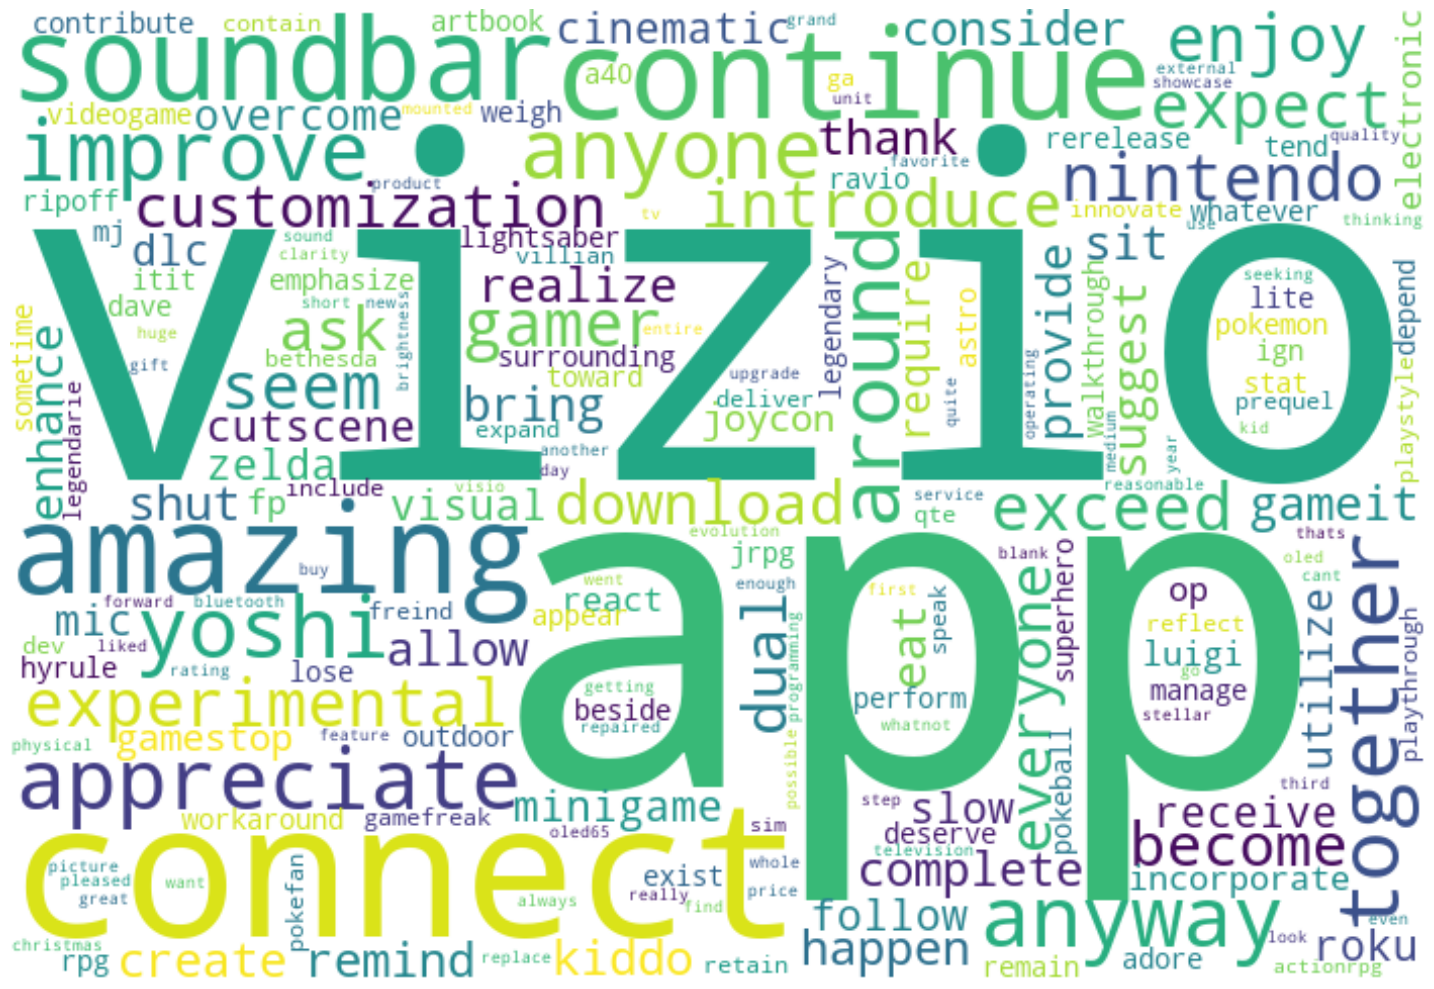

In [50]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming stop_words is defined somewhere earlier in your code

# Set up WordCloud parameters
stopwords = set(STOPWORDS)
stopwords.update(['words', 'to', 'exclude', 'from', 'the', 'wordcloud'])
wrd = WordCloud(
    background_color='white',
    width=700,
    height=480,
    margin=0,
    collocations=False,
    stopwords=stopwords
)

# Generate the word cloud for positive sentiment words
pos_wordcloud = wrd.generate(' '.join(terms_words))

# Plot the word cloud for positive sentiment words
plt.figure(figsize=(20, 10))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()  # Adjust layout to make it tighter
plt.show()

# Save the word cloud image
wrd.to_file('positivos_wordcloud.png')

In [51]:
from afinn import Afinn

# Initialize the AFINN sentiment analyzer
afinn = Afinn()

# Concatenate the values of the 'Tags' column into a single string
filtered_sentence = ' '.join(' '.join(tags) for tags in neg_reviews['tags'])

# Calculate the sentiment score for the entire text
overall_sentiment = afinn.score(filtered_sentence)

print("Overall sentiment:", overall_sentiment)

# Split the text into individual words
words = filtered_sentence.split()

# Create a dictionary to store sentiment scores for each word
word_sentiments = {word: afinn.score(word) for word in words}

# Now you can print the individual words based on their sentiment scores
terms_words = [word for word, score in word_sentiments.items() if score < 0]

Overall sentiment: 6253.0


In [52]:
terms_words

['mistake',
 'hard',
 'challenge',
 'silly',
 'hate',
 'annoyance',
 'alone',
 'annoys',
 'annoying',
 'kill',
 'confusing',
 'war',
 'bad',
 'wrong',
 'suck',
 'disappointed',
 'severe',
 'pain',
 'missing',
 'broken',
 'childish',
 'mess',
 'accidentally',
 'stuck',
 'losing',
 'worst',
 'battle',
 'waste',
 'awful',
 'sad',
 'worse',
 'weak',
 'sorry',
 'limited',
 'stop',
 'doubt',
 'disappointment',
 'worrying',
 'firing',
 'enemy',
 'attack',
 'stopped',
 'trouble',
 'lag',
 'beaten',
 'drop',
 'dumb',
 'problem',
 'destroyed',
 'broke',
 'leave',
 'stupid',
 'insulting',
 'biased',
 'crush',
 'headache',
 'warning',
 'horrible',
 'dislike',
 'flop',
 'poor',
 'complaining',
 'useless',
 'frustrating',
 'dirt',
 'cut',
 'penalty',
 'garbage',
 'boring',
 'unacceptable',
 'wasted',
 'error',
 'weird',
 'leaked',
 'lack',
 'inhibit',
 'missed',
 'prevent',
 'shame',
 'fail',
 'hurt',
 'lost',
 'crap',
 'blocking',
 'worn',
 'badly',
 'frustration',
 'upset',
 'defect',
 'sluggish',

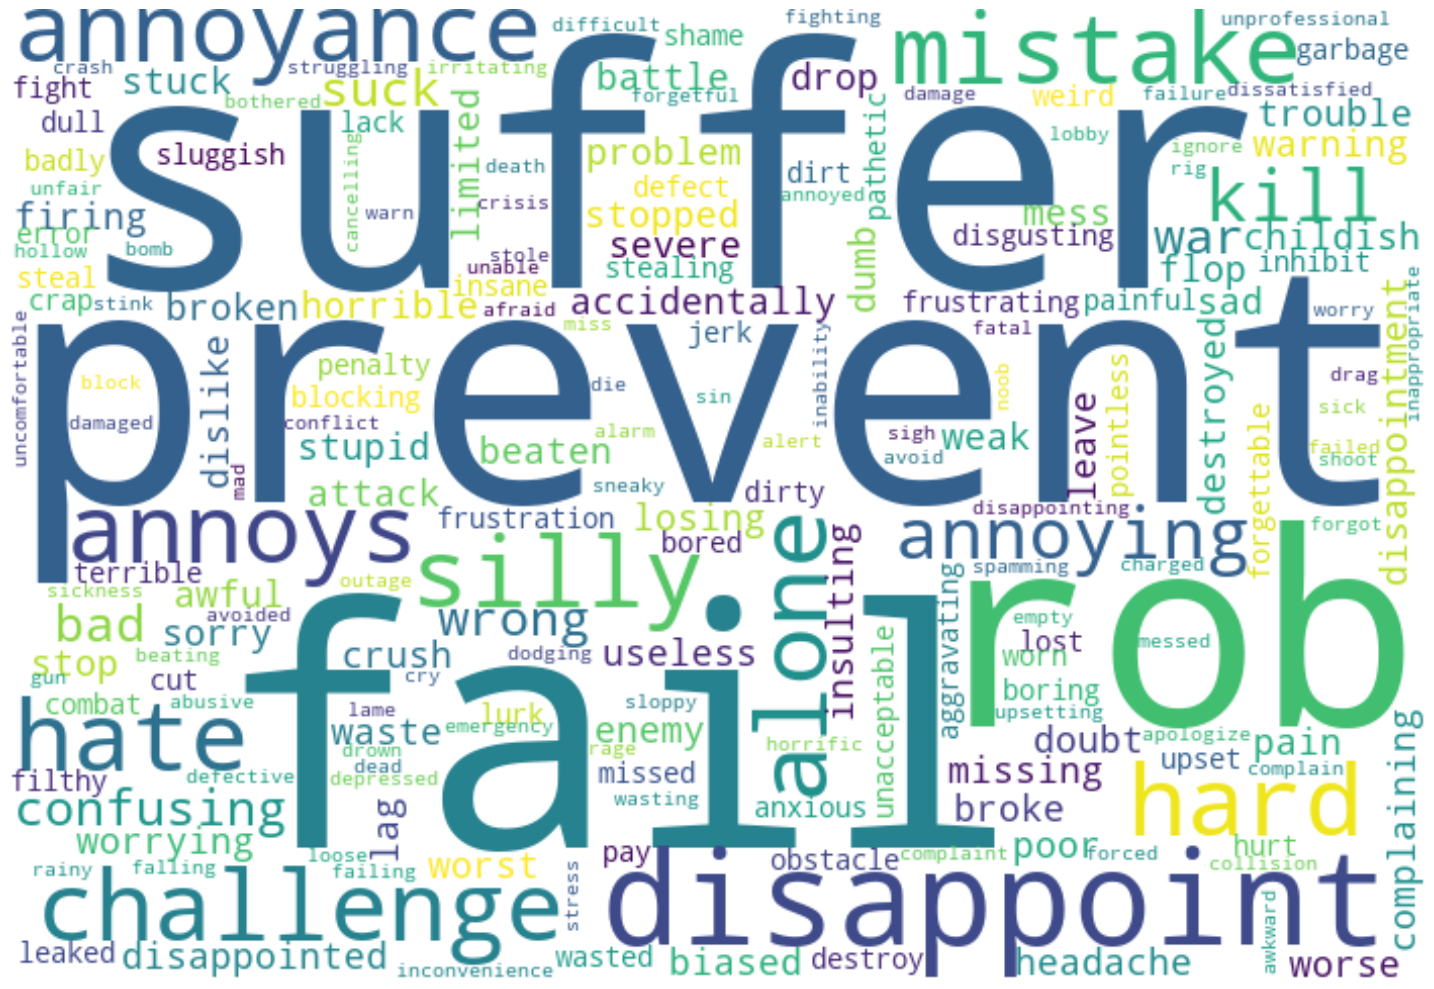

In [53]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming stop_words is defined somewhere earlier in your code

# Set up WordCloud parameters
stopwords = set(STOPWORDS)
stopwords.update(['words', 'to', 'exclude', 'from', 'the', 'wordcloud'])
wrd = WordCloud(
    background_color='white',
    width=700,
    height=480,
    margin=0,
    collocations=False,
    stopwords=stopwords
)

# Generate the word cloud for negative sentiment words
neg_wordcloud = wrd.generate(' '.join(terms_words))

# Plot the word cloud for positive sentiment words
plt.figure(figsize=(20, 10))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()  # Adjust layout to make it tighter
plt.show()

# Save the word cloud image
wrd.to_file('negativos_wordcloud.png')

In [54]:
neg_reviews[neg_reviews['review_description'].str.contains('fail')]

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status,tags
444,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,pros: price was awesome for an oled. picture ...,0,0,3,4.2727,363,0,"[pro, price, awesome, oled, picture, pristine,..."
700,Square Enix,Thief - Xbox One,video-games,xbox-one,thief---xbox-one,the controls are glitchy at best. try sneaking...,0,0,2,3.52,125,0,"[control, glitchy, best, try, sneaking, someon..."
780,Square Enix,Thief - Xbox One,video-games,xbox-one,thief---xbox-one,okay! i had to write a review. i do not do thi...,26,25,2,3.52,125,0,"[okay, write, review, often, first, time, watc..."
931,RIG,RIG 800HS Wireless Gaming Headset for PlayStat...,consoles-hardware,desktops-laptops,pc-headsets,dead on arrival. tons of reviews about failed ...,4,3,1,4.4111,596,0,"[dead, arrival, ton, review, failed, battery, ..."
1417,THQ Nordic,Remnant: From the Ashes - PlayStation 4,video-games,playstation-4,remnant-from-the-ashes---playstation-4,"the graphics, game play, and level design for ...",6,16,2,3.8,35,0,"[graphic, game, play, level, design, remnant, ..."
2173,Nintendo,Pokemon Black - Nintendo DS,video-games,nds,pokemon-black---nintendo-ds,well the game is good. the new pokemon are jus...,4,1,4,4.4195,553,0,"[game, good, new, pokemon, big, happened, poke..."
2187,2K Games,WWE 2K19 - PlayStation 4,video-games,playstation-4,wwe-2k19---playstation-4,a very ambitious game. i can see what the the ...,0,0,3,4.2351,1195,0,"[ambitious, game, see, developer, mind, game, ..."
2863,Samsung,Samsung 49-in Super Ultra-Wide Dual QHD (5120x...,consoles-hardware,desktops-laptops,monitors,demonstrated crippling issues out of the box.\...,0,0,1,4.5319,643,0,"[demonstrated, crippling, issue, box, tested, ..."
3917,Activision,Angry Birds: Star Wars - Xbox One,video-games,xbox-one,angry-birds-star-wars---xbox-one,this game should have been ended a long time a...,3,6,2,4.2941,17,0,"[game, ended, long, time, ago, mobile, device,..."
4221,Bethesda Softworks,Fallout 4 - PlayStation 4,video-games,playstation-4,fallout-4---playstation-4,i had really high hopes for this game when i h...,1,3,3,4.4535,1182,0,"[really, high, hope, game, heard, released, fi..."


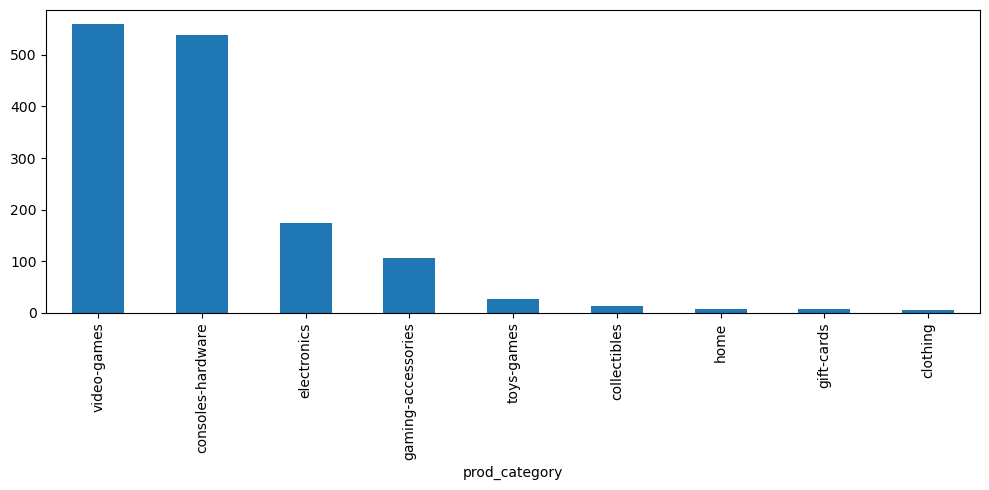

In [55]:
plt.figure(figsize=(10, 5))
neg_reviews['prod_category'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

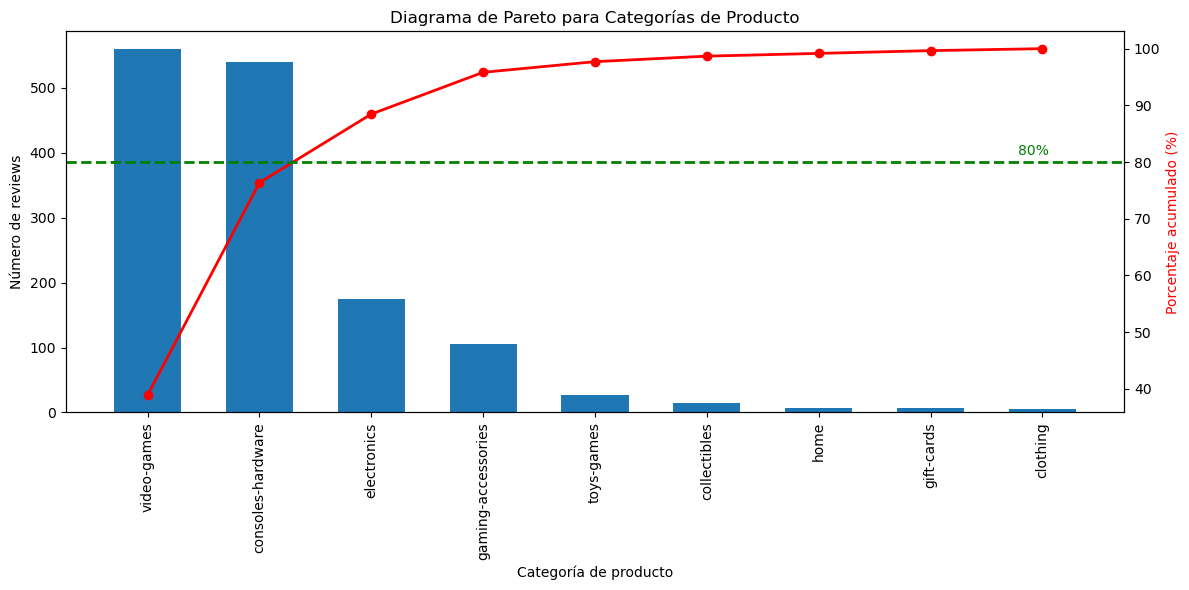

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que ya tienes definido 'neg_reviews' como tu DataFrame y 'prod_category' es una columna en él

# Calcular los recuentos de cada categoría
category_counts = neg_reviews['prod_category'].value_counts()

# Ordenar las categorías por frecuencia descendente
sorted_categories = category_counts.sort_values(ascending=False)

# Calcular la suma acumulada y el porcentaje acumulado
cumulative_counts = sorted_categories.cumsum()
cumulative_percentage = cumulative_counts / cumulative_counts.max() * 100

# Crear el gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ancho de las barras
bar_width = 0.6

# Rotar etiquetas del eje x y ajustar espaciado
plt.xticks(rotation=90, ha='center')
plt.subplots_adjust(bottom=0.3)  # Ajustar margen inferior para evitar superposiciones

# Gráfico de barras con color predeterminado
bars = ax1.bar(sorted_categories.index, sorted_categories, width=bar_width)
ax1.set_xlabel('Categoría de producto')
ax1.set_ylabel('Número de reviews')

# Segundo eje y para el porcentaje acumulado
ax2 = ax1.twinx()
line = ax2.plot(sorted_categories.index, cumulative_percentage, color='r', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Porcentaje acumulado (%)', color='r')

# Añadir línea horizontal en 80%
ax2.axhline(y=80, color='g', linestyle='--', linewidth=2)
ax2.text(0.9, 82, '80%', color='g', va='center', ha='left', transform=ax2.get_yaxis_transform())  # Ajustar posición del texto

# Título y mostrar el gráfico
plt.title('Diagrama de Pareto para Categorías de Producto')
plt.tight_layout()
plt.show()

#### Observaciones:

1. el 80% de los comentarios negativos provienen del 20% de las categorias de productos (video games y consoles-hardware). Evidentemente de los productos que las personas mas compran y hacen comentarios
2. Para poner un modelo experimental de producción y sea lo mas preciso, utilizaremos la información de solo esas 2 categorias, con comentarios positivos y negativos

# Parte III. Análisis de sentimientos con ML

1. **Entrene uno o varios modelos para clasificar los comentarios en las siguientes categorías: positivos (rating 4 - 5), neutrales (rating 3) y negativos.**  
   Justifica qué métrica de evaluación has elegido para determinar el modelo que pondrías en producción.
-------------------------------------------------------------------------------------------------------

In [57]:
processed_reviews_df.drop(columns=['prod_type','tags'], inplace=True)

column_order = ['brand', 'prod_category', 'prod_subcategory','product_name',
       'review_description', 'helpful_count', 'not_helpful_count',
       'average_rating', 'reviews_count','rating','review_status']

processed_reviews_df = processed_reviews_df[column_order]
processed_reviews_df.head()

,brand,prod_category,prod_subcategory,product_name,review_description,helpful_count,not_helpful_count,average_rating,reviews_count,rating,review_status
0,VIZIO,electronics,tvs-monitors,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,my new oled is a upgrade and it's great! this...,0,0,4.2727,363,5,1
1,VIZIO,electronics,tvs-monitors,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,rating is really a 4.5 but that's unavailable....,0,0,4.2727,363,4,1
2,VIZIO,electronics,tvs-monitors,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,i’m quite pleased with the entire product as a...,0,0,4.2727,363,4,1
3,VIZIO,electronics,tvs-monitors,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,i’ve only had my new visio oled65 mounted and ...,0,0,4.2727,363,2,1
4,VIZIO,electronics,tvs-monitors,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,the picture is very crisp and the blacks very ...,0,0,4.2727,363,5,1


In [58]:
pre_model_reviews_df = processed_reviews_df[(processed_reviews_df['prod_category'] == 'video-games')
                                         | (processed_reviews_df['prod_category'] == 'console-hardware')].reset_index(drop=True)

pre_model_reviews_df.head()

,brand,prod_category,prod_subcategory,product_name,review_description,helpful_count,not_helpful_count,average_rating,reviews_count,rating,review_status
0,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,yoshi game was awesome and still playing it th...,0,0,4.6556,2390,5,0
1,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,great game. you will enjoy it. good price wort...,0,0,4.6556,2390,5,0
2,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,"my son loves to play this game, he's been play...",0,0,4.6556,2390,5,0
3,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,the game is great for a family and younger chi...,0,0,4.6556,2390,5,0
4,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,it would be better if poochy was in all of the...,1,0,4.6556,2390,4,0


In [59]:
# ¿Cuantas reseñas y positivas hay en total?
pre_model_reviews_df['rating'].value_counts()

rating
5    1439
4     572
3     162
1     153
2      99
Name: count, dtype: int64

In [60]:
# What are the data types?
pre_model_reviews_df.dtypes.value_counts()

object    6
int64     5
Name: count, dtype: int64

Voy a revisar si las columnas o features tienen correlaciones fuertes

In [61]:
pre_model_reviews_df_corr = round(pre_model_reviews_df.corr(numeric_only=True), 2)
pre_model_reviews_df_corr.style.background_gradient(cmap='coolwarm')

,helpful_count,not_helpful_count,reviews_count,rating,review_status
helpful_count,1.000000,0.270000,-0.140000,-0.020000,-0.000000
not_helpful_count,0.270000,1.000000,-0.080000,-0.340000,-0.250000
reviews_count,-0.140000,-0.080000,1.000000,0.100000,-0.020000
rating,-0.020000,-0.340000,0.100000,1.000000,0.600000
review_status,-0.000000,-0.250000,-0.020000,0.600000,1.000000


La columna 'review_status' (recomienda un producto o no) tiene una correlación moderada con el rating.

In [62]:
pre_model_reviews_df.head()

,brand,prod_category,prod_subcategory,product_name,review_description,helpful_count,not_helpful_count,average_rating,reviews_count,rating,review_status
0,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,yoshi game was awesome and still playing it th...,0,0,4.6556,2390,5,0
1,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,great game. you will enjoy it. good price wort...,0,0,4.6556,2390,5,0
2,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,"my son loves to play this game, he's been play...",0,0,4.6556,2390,5,0
3,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,the game is great for a family and younger chi...,0,0,4.6556,2390,5,0
4,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,it would be better if poochy was in all of the...,1,0,4.6556,2390,4,0


In [63]:
cat_feat_df = pre_model_reviews_df[['brand', 'prod_category', 'prod_subcategory', 'product_name', 'review_description']]
cat_feat_df.head()

,brand,prod_category,prod_subcategory,product_name,review_description
0,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,yoshi game was awesome and still playing it th...
1,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,great game. you will enjoy it. good price wort...
2,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,"my son loves to play this game, he's been play..."
3,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,the game is great for a family and younger chi...
4,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,it would be better if poochy was in all of the...


In [64]:
pre_model_reviews_df = pre_model_reviews_df[['product_name','helpful_count','not_helpful_count','average_rating','reviews_count','review_status','rating']]
pre_model_reviews_df.head()

,product_name,helpful_count,not_helpful_count,average_rating,reviews_count,review_status,rating
0,Yoshi's Crafted World - Nintendo Switch,0,0,4.6556,2390,0,5
1,Yoshi's Crafted World - Nintendo Switch,0,0,4.6556,2390,0,5
2,Yoshi's Crafted World - Nintendo Switch,0,0,4.6556,2390,0,5
3,Yoshi's Crafted World - Nintendo Switch,0,0,4.6556,2390,0,5
4,Yoshi's Crafted World - Nintendo Switch,1,0,4.6556,2390,0,4


In [65]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame para no modificar el original
df_encoded = pre_model_reviews_df.copy()

# Inicializar el LabelEncoder
le = LabelEncoder()

# Identificar las columnas categóricas (todas excepto 'rating')
categorical_columns = df_encoded.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder a cada columna categórica
for column in categorical_columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])

# Mostrar el DataFrame resultante
df_encoded.head()


,product_name,helpful_count,not_helpful_count,average_rating,reviews_count,review_status,rating
0,53,0,0,43,2390,0,5
1,53,0,0,43,2390,0,5
2,53,0,0,43,2390,0,5
3,53,0,0,43,2390,0,5
4,53,1,0,43,2390,0,4


In [66]:
from sklearn.preprocessing import RobustScaler

# Crear una copia del DataFrame para no modificar el original
df_normalized = df_encoded.copy()

# Inicializar el RobustScaler
scaler = RobustScaler()

# Identificar las columnas que queremos normalizar
columns_to_normalize = df_normalized.columns.difference(['rating'])

# Aplicar el RobustScaler a las columnas seleccionadas
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

# Mostrar el DataFrame resultante
df_normalized.head()


,product_name,helpful_count,not_helpful_count,average_rating,reviews_count,review_status,rating
0,0.636364,0.0,0.0,0.714286,2.018028,-1.0,5
1,0.636364,0.0,0.0,0.714286,2.018028,-1.0,5
2,0.636364,0.0,0.0,0.714286,2.018028,-1.0,5
3,0.636364,0.0,0.0,0.714286,2.018028,-1.0,5
4,0.636364,0.5,0.0,0.714286,2.018028,-1.0,4


In [67]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = df_normalized.drop('rating', axis=1)
y = df_normalized['rating']

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (1940, 6), X_test shape: (485, 6)
y_train shape: (1940,), y_test shape: (485,)


In [68]:
round(X_train.describe(), 2)

,product_name,helpful_count,not_helpful_count,average_rating,reviews_count,review_status
count,1940.00,1940.00,1940.00,1940.00,1940.00,1940.00
mean,-0.07,0.88,1.41,-0.07,0.25,-0.22
std,0.48,2.48,6.50,0.67,0.68,0.42
min,-0.97,0.00,0.00,-2.36,-0.52,-1.00
25%,-0.58,0.00,0.00,-0.50,-0.26,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.42,1.00,1.00,0.29,0.74,0.00
max,0.64,51.50,125.00,0.93,2.02,0.00


In [69]:
round(y_train.describe(),2)

count    1940.00
mean        4.27
std         1.14
min         1.00
25%         4.00
50%         5.00
75%         5.00
max         5.00
Name: rating, dtype: float64

In [70]:
round(X_test.describe(),2)

,product_name,helpful_count,not_helpful_count,average_rating,reviews_count,review_status
count,485.00,485.00,485.00,485.00,485.00,485.00
mean,-0.05,0.95,1.62,-0.04,0.26,-0.26
std,0.47,1.81,6.33,0.67,0.69,0.44
min,-0.97,0.00,0.00,-2.36,-0.52,-1.00
25%,-0.58,0.00,0.00,-0.36,-0.26,-1.00
50%,0.00,0.50,0.00,0.00,0.07,0.00
75%,0.42,1.00,1.00,0.50,0.74,0.00
max,0.64,15.50,86.00,0.93,2.02,0.00


In [71]:
round(y_test.describe(),2)

count    485.00
mean       4.19
std        1.20
min        1.00
25%        4.00
50%        5.00
75%        5.00
max        5.00
Name: rating, dtype: float64

### Modelos

In [72]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)

In [73]:
# Make a dict of hyperparameters values to search

search_space = {
    'n_estimators': [100,200,500],
    'max_depth': [3,6,9],
    'gamma': [0.01,0.1],
    'learning_rate': [0.001,0.01,0.1,1]
}

In [74]:
from sklearn.model_selection import GridSearchCV

GS = GridSearchCV(estimator = xgb_model,
                 param_grid = search_space,
                 scoring = ['r2','neg_root_mean_squared_error'], # sklearn.metrics.SCORERS.keys()
                 refit = 'r2',
                 cv = 5,
                 verbose = 4)

In [75]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-3.587) r2: (test=-9.840) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-3.596) r2: (test=-9.148) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-3.583) r2: (test=-8.143) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-3.610) r2: (test=-9.219) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-3.525) r2: (test=-8.386) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-3.262) r2: (test=-7.968) total time=   0

[CV 5/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.921) r2: (test=0.360) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.756) r2: (test=0.518) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.695) r2: (test=0.621) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.721) r2: (test=0.630) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.770) r2: (test=0.536) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.760) r2: (test=0.563) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=6, n_estimators

[CV 1/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-0.803) r2: (test=0.456) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-0.746) r2: (test=0.563) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-0.759) r2: (test=0.589) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-0.804) r2: (test=0.493) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-0.800) r2: (test=0.517) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=500; neg_root_mean_squared_error: (test=-0.803) r2: (test=0.456) total time=   0.1s
[CV 2/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=500; n

[CV 5/5] END gamma=0.01, learning_rate=1, max_depth=6, n_estimators=500; neg_root_mean_squared_error: (test=-0.890) r2: (test=0.402) total time=   0.1s
[CV 1/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-0.874) r2: (test=0.357) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-0.787) r2: (test=0.514) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-0.832) r2: (test=0.507) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-0.837) r2: (test=0.450) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-0.850) r2: (test=0.454) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=200; neg_root_mean_s

[CV 3/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-3.257) r2: (test=-6.557) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-3.282) r2: (test=-7.445) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-3.204) r2: (test=-6.755) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-2.489) r2: (test=-4.221) total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-2.475) r2: (test=-3.807) total time=   0.1s
[CV 3/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-2.465) r2: (test=-3.329) total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_esti

[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.761) r2: (test=0.563) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.760) r2: (test=0.513) total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.699) r2: (test=0.617) total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.727) r2: (test=0.624) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.769) r2: (test=0.536) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.763) r2: (test=0.560) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500; neg_root

[CV 4/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.827) r2: (test=0.463) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.812) r2: (test=0.501) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=100; neg_root_mean_squared_error: (test=-0.855) r2: (test=0.384) total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=100; neg_root_mean_squared_error: (test=-0.730) r2: (test=0.582) total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=100; neg_root_mean_squared_error: (test=-0.824) r2: (test=0.517) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=100; neg_root_mean_squared_error: (test=-0.848) r2: (test=0.437) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=100; neg_root_mean_squared_

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             param_grid={'gamma': [0.01, 0.1],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 500]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [76]:
print(GS.best_estimator_) # To get the complete details of the best model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)


In [77]:
print(GS.best_params_) # to get only the best hypterparameter values that we searched for


{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [78]:
print(GS.best_score_) # score according to the metric we passed in refit

0.5749534265415843


In [79]:
# Obtener los mejores hiperparámetros
best_params = GS.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtener los resultados
results = GS.cv_results_

Mejores hiperparámetros: {'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [80]:
from sklearn.metrics import mean_squared_error, f1_score, precision_score, recall_score, roc_auc_score
# Obtener el mejor modelo
best_model = GS.best_estimator_

# Predecir los valores en los datos de prueba
y_pred = best_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE en datos de prueba:", rmse)

RMSE en datos de prueba: 0.8270584378595635


In [86]:
solution = []
for i, value in enumerate(y_pred):
    solution.append((i,int(value)))

In [87]:
train_model = pd.DataFrame(solution)
train_model

,0,1
0,0,4
1,1,4
2,2,4
3,3,4
4,4,4
...,...,...
480,480,4
481,481,4
482,482,4
483,483,4


In [88]:
train_model.columns=["id", "rating"]

In [89]:
train_model.reset_index(drop=True)

,id,rating
0,0,4
1,1,4
2,2,4
3,3,4
4,4,4
...,...,...
480,480,4
481,481,4
482,482,4
483,483,4


In [90]:
train_model['rating'].value_counts()

rating
4    392
2     40
1     26
3     24
5      3
Name: count, dtype: int64

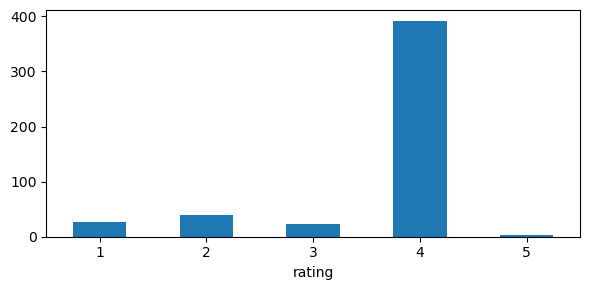

In [98]:
plt.figure(figsize=(6, 3))
train_model['rating'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [100]:
# from pathlib import Path
# filepath = Path('./data/trained/train_model.csv', index=False)  
# filepath.parent.mkdir(parents=True, exist_ok=True) 
# train_model.to_csv(filepath, index=False, encoding='utf-8')